In [27]:
import numpy as np
import pandas as pd 
from frites import set_mpl_style #If you don't have comment this line
import scipy.stats as stats
import matplotlib.pyplot as plt

In [28]:
set_mpl_style()#comment this one if you don't have the frites package

In [29]:
class BetaModel():
    def __init__(self,v_target,leak_factor=1):             
                
        self.a = 1  # the number of times this action returned a win       
        self.b = 1  # the number of times this action returned a loss
        self.n=0 # number of trials 
        self.omega=leak_factor
        self.vt=v_target #is the absolute value of the target velocity
        # pass the true probablity of the outcome|action taken              
    
    def outcome(self,q):        
        #return the boolean if 1 means that the eye and target have the same direction otherwwise the eye anticpates in
        #the wrong direction
        return stats.bernoulli.rvs(q) 
                    
    def update(self,reward):
        """ 
        reward here is the direction of the eye: 1 if it is the same as the target's direction otherwise 0
        
        """
        self.n += 1    
        
        if reward==1:
            self.a += 1
        
        else:
            self.b += 1
        
        self.a*=self.omega
        self.b*=self.omega
        
    def reset(self):
        self.n=0
        self.a=1
        self.b=1

    def sample(self):
         #return a value sampled from the beta distribution 
        return np.random.beta(self.a,self.b)
        #return np.mean(np.random.beta(self.a,self.b,10))

    def velocity(self):
        p=self.a/(self.a+self.b)
        #Linear Hypothesis
        return 0.5*self.vt*(2*p-1)
        
        
   

In [30]:
stats.bernoulli.rvs(0.5)

0

In [42]:
v_target=10
agent=BetaModel(v_target)
k=0.5
mu=[]
V=[]
O=[]
VVV=[]
OOO=[]
MU=[]
#Probability of the target going right 
P=[0.25,.5,0.75]
V_THEOS=[]
for p in P:
    for i in range(200):
        o=agent.outcome(p)
        O.append(o)
        V.append(agent.velocity())
        agent.update(o)
        mu.append(agent.a/(agent.a+agent.b))
    VVV.append(V)
    OOO.append(O)
    MU.append(mu)
    
    print("The estimated probability of the target going right estimated by the agent is:",agent.a/(agent.a+agent.b))
    print("The antipatory velocity of the agent is ", V[-1])
    v_theo=k*v_target*(2*p-1)
    V_THEOS.append(v_theo)
    print("The optimal anticpatory theorical velocitiy is " ,v_theo,'\n')
    mu=[]
    V=[]
    O=[]
    agent.reset()
    

The estimated probability of the target going right estimated by the agent is: 0.24752475247524752
The antipatory velocity of the agent is  -2.512437810945274
The optimal anticpatory theorical velocitiy is  -2.5 

The estimated probability of the target going right estimated by the agent is: 0.5297029702970297
The antipatory velocity of the agent is  0.2736318407960203
The optimal anticpatory theorical velocitiy is  0.0 

The estimated probability of the target going right estimated by the agent is: 0.7524752475247525
The antipatory velocity of the agent is  2.512437810945274
The optimal anticpatory theorical velocitiy is  2.5 



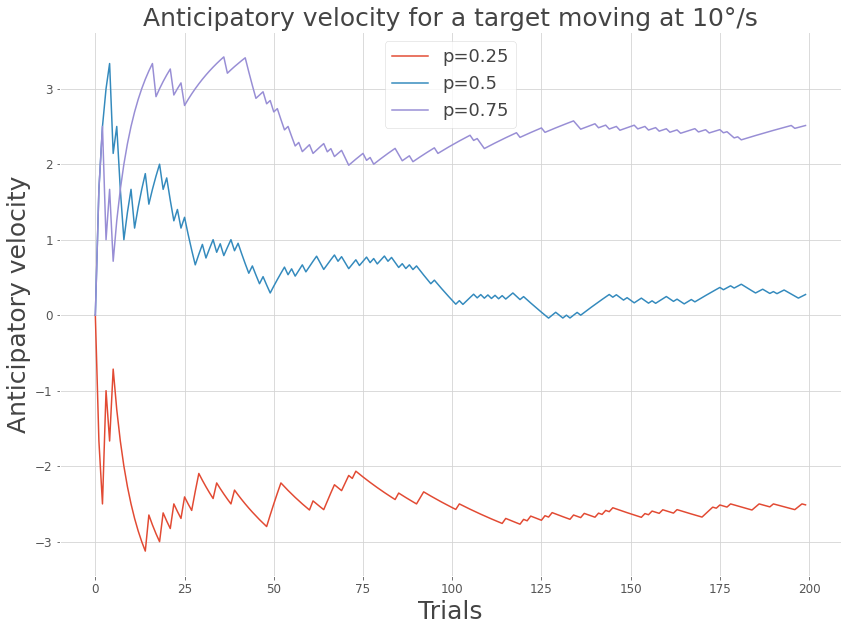

In [43]:
for v,p in zip(VVV,P):
    plt.plot(v,label=f'p={p}')
plt.xlabel("Trials",fontsize=25)
plt.ylabel("Anticipatory velocity",fontsize=25)
plt.title("Anticipatory velocity for a target moving at 10°/s",fontsize=25)
plt.legend()

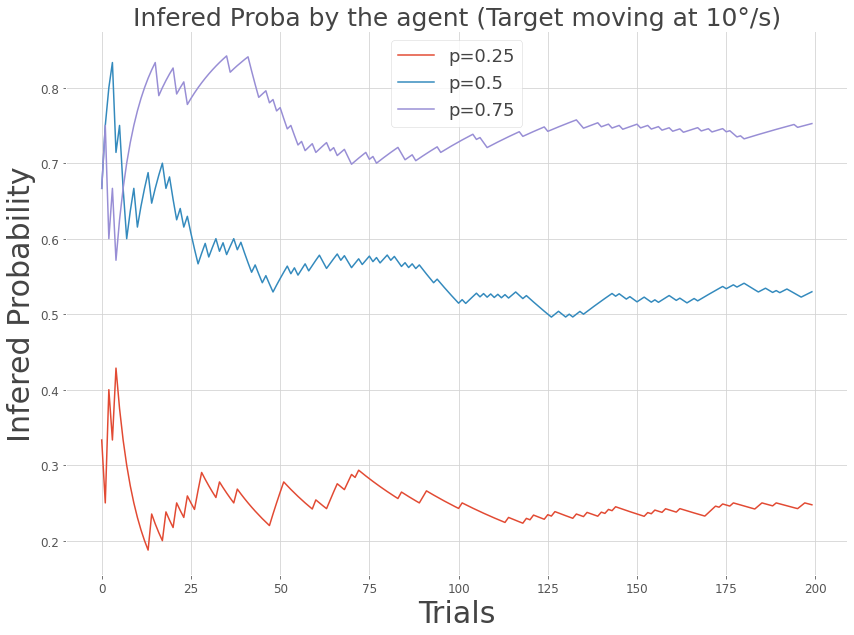

In [44]:
for m,p in zip(MU,P):
    plt.plot(m,label=f'p={p}')
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Infered Probability",fontsize=30)
plt.title("Infered Proba by the agent (Target moving at 10°/s)",fontsize=25)
plt.legend()

In [45]:
ERRS=[]
for O,V in zip(OOO,VVV):
    Err=np.array(O)*(v_target-np.array(V))**2 + (1-np.array(O))*(v_target+np.array(V))**2
    ERRS.append(Err)

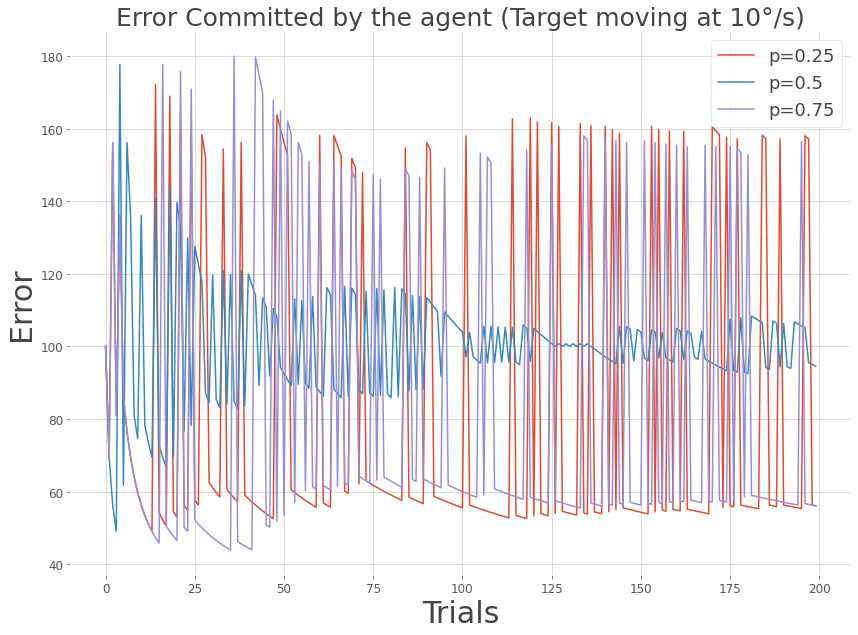

In [46]:
for e,p in zip(ERRS,P):
    plt.plot(e,label=f'p={p}')

plt.xlabel("Trials",fontsize=30)
plt.ylabel("Error",fontsize=30)
plt.title("Error Committed by the agent (Target moving at 10°/s)",fontsize=25)
plt.legend()

In [47]:
for e,v_th,p in zip(ERRS,V_THEOS,P):
    theo_Err=p*(v_target-v_th)**2 + (1-p)*(v_target+v_th)**2
    print("Empirical error of the agent is ", np.mean(e))
    print("Theoritical error of the agent is ",theo_Err,'\n')

Empirical error of the agent is  81.74029445640429
Theoritical error of the agent is  81.25 

Empirical error of the agent is  100.28041400231325
Theoritical error of the agent is  100.0 

Empirical error of the agent is  81.80359879975829
Theoritical error of the agent is  81.25 



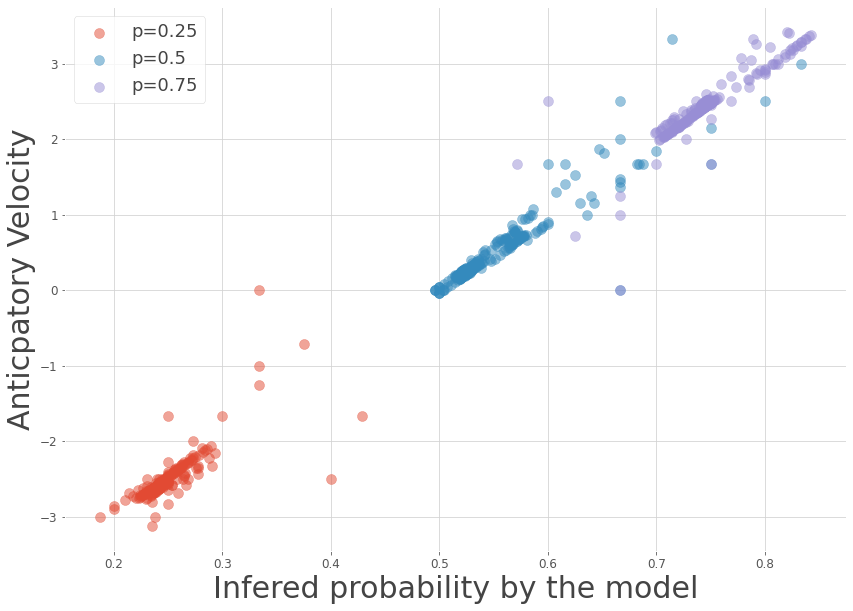

In [48]:
for m,v,p in zip(MU,VVV,P):
    plt.scatter(m,v,s=100,label=f'p={p}',alpha=0.5)
plt.xlabel("Infered probability by the model",fontsize=30)
plt.ylabel("Anticpatory Velocity",fontsize=30)
plt.legend()

Text(0.5, 1.0, 'Theoritical Plot of the Relationship: Proba & Velocity')

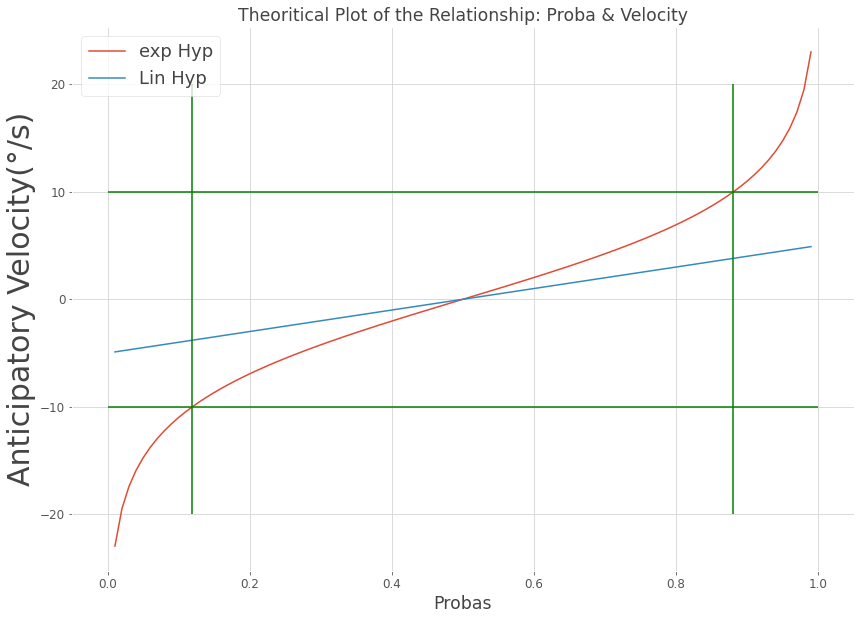

In [49]:
#Theorical plot
P=np.linspace(0.01,1,100,endpoint=False)
VV=v_target*1/2*np.log(P/(1-P))
plt.plot(P,VV,label="exp Hyp")
VV=0.5*v_target*(2*P-1)
plt.plot(P,VV,label="Lin Hyp")
plt.hlines(-v_target,0,1,colors="green")
plt.hlines(v_target,0,1,colors="green")
plt.vlines(1/(np.exp(2)+1),-20,20,colors="green")
plt.vlines(1/(np.exp(-2)+1),-20,20,colors="green")
plt.xlabel("Probas")
plt.ylabel("Anticipatory Velocity(°/s)",fontsize=30)
plt.legend()
plt.title("Theoritical Plot of the Relationship: Proba & Velocity")


In [39]:
1/(np.exp(2)+1)

0.11920292202211755

In [40]:
1/(np.exp(-2)+1)

0.8807970779778823